In [1]:
from google.colab import drive

In [4]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import os


In [5]:
zip_path = '/content/drive/MyDrive/data2.zip'

In [6]:
import zipfile

In [7]:
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall('/content/data')

In [8]:
os.listdir('/content/data')

['Data']

In [9]:
import pandas as pd

In [10]:
df = pd.read_csv('//content/data/Data/raw_analyst_ratings.csv.zip')

# Step 2: Load the CSV File into a DataFrame

In [24]:
import pandas as pd

df = pd.read_csv('//content/data/Data/raw_analyst_ratings.csv.zip')
# Display the first few rows of the DataFrame
df.head()


,Unnamed: 0,headline,url,publisher,date,stock
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A
4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A


# Step 3: Perform Descriptive Statistics
### 1. Basic Textual Length Statistics (Headline Lengths)

In [25]:
df['headline_length'] = df['headline'].apply(len)

# Display basic statistics for headline lengths
print(df['headline_length'].describe())


count    1.407328e+06
mean     7.312051e+01
std      4.073531e+01
min      3.000000e+00
25%      4.700000e+01
50%      6.400000e+01
75%      8.700000e+01
max      5.120000e+02
Name: headline_length, dtype: float64


# 2. Count Articles Per Publisher

Top Publishers by Article Count:
publisher
Paul Quintaro                      228373
Lisa Levin                         186979
Benzinga Newsdesk                  150484
Charles Gross                       96732
Monica Gerson                       82380
                                    ...  
Shazir Mucklai - Imperium Group         1
Laura Jennings                          1
Eric Martin                             1
Jose Rodrigo                            1
Jeremie Capron                          1
Name: count, Length: 1034, dtype: int64


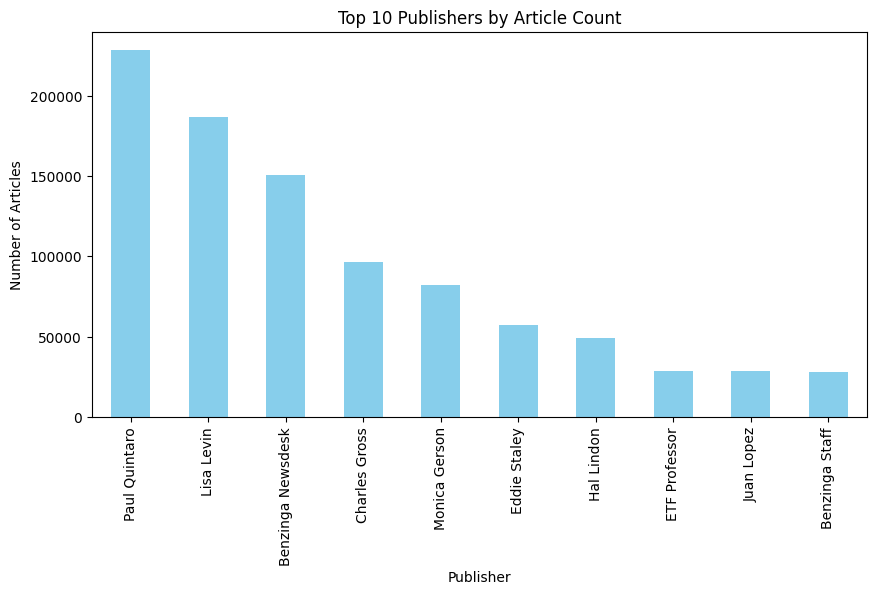

In [26]:
publisher_counts = df['publisher'].value_counts()

print("Top Publishers by Article Count:")
print(publisher_counts)

# Plot the top 10 publishers
import matplotlib.pyplot as plt

publisher_counts.head(10).plot(kind='bar', figsize=(10, 5), color='skyblue')
plt.title('Top 10 Publishers by Article Count')
plt.xlabel('Publisher')
plt.ylabel('Number of Articles')
plt.show()


# 3. Publication Date Trends
## Convert the date column to a datetime format and analyze trends over time:

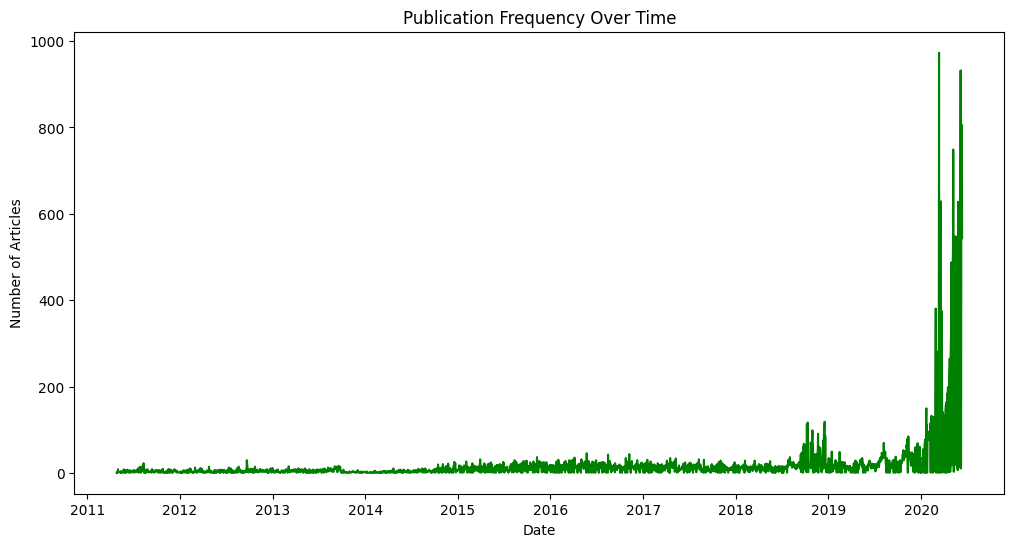

In [27]:
df['date'] = pd.to_datetime(df['date'], errors='coerce')

# Drop rows with invalid dates
df = df.dropna(subset=['date'])

# Count articles by date
date_counts = df['date'].dt.date.value_counts().sort_index()

# Plot publication frequency over time
date_counts.plot(figsize=(12, 6), color='green')
plt.title('Publication Frequency Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Articles')
plt.show()


# Step 4: Text Analysis (Sentiment Analysis & Topic Modeling)
# 1. Sentiment Analysis
We will use the nltk library for sentiment analysis.

# Install and Import nltk:

In [28]:
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer

nltk.download('vader_lexicon')
sia = SentimentIntensityAnalyzer()


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


# Perform Sentiment Analysis on Headlines:

sentiment_category
Neutral     26075
Positive    16644
Negative    13268
Name: count, dtype: int64


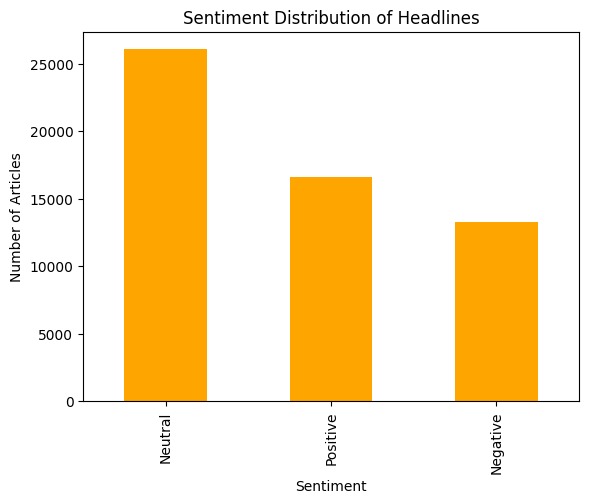

In [29]:
df['sentiment'] = df['headline'].apply(lambda x: sia.polarity_scores(x)['compound'])

# Classify sentiments as Positive, Negative, or Neutral
df['sentiment_category'] = df['sentiment'].apply(
    lambda x: 'Positive' if x > 0 else ('Negative' if x < 0 else 'Neutral')
)

# Display sentiment distribution
print(df['sentiment_category'].value_counts())

# Plot sentiment distribution
df['sentiment_category'].value_counts().plot(kind='bar', color='orange')
plt.title('Sentiment Distribution of Headlines')
plt.xlabel('Sentiment')
plt.ylabel('Number of Articles')
plt.show()


# Topic Modeling (Extracting Keywords)
We will use CountVectorizer from scikit-learn to identify keywords.

# Import Libraries:

In [30]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(stop_words='english', max_features=20)
X = vectorizer.fit_transform(df['headline'].dropna())

# Display top keywords
keywords = vectorizer.get_feature_names_out()
print("Top Keywords in Headlines:", keywords)


Top Keywords in Headlines: ['52' 'companies' 'eps' 'estimate' 'higher' 'hit' 'lows' 'maintains'
 'market' 'new' 'price' 'q1' 'sales' 'session' 'shares' 'stocks' 'target'
 'trading' 'week' 'yesterday']


# Step 5: Time Series Analysis
# Publication Frequency Over Time

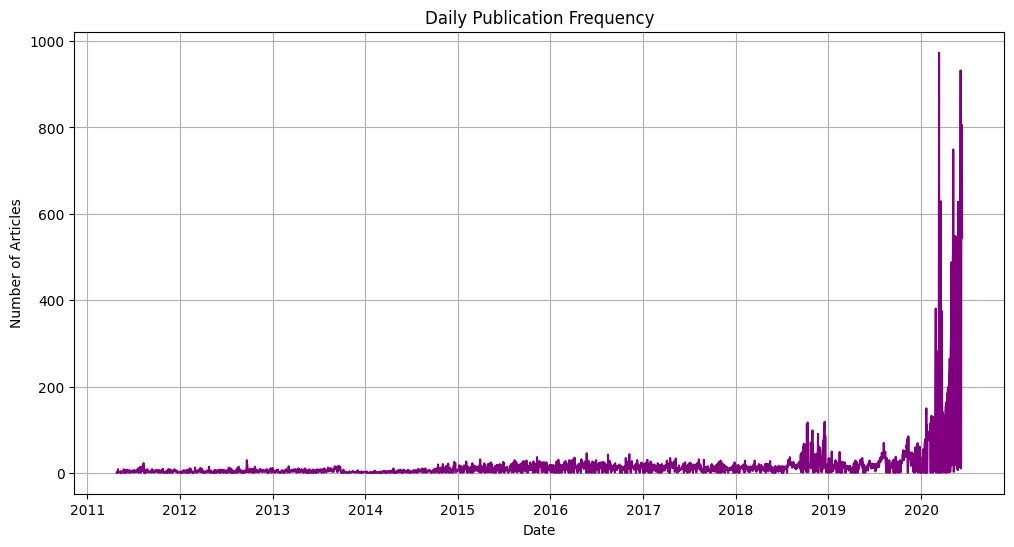

In [31]:
df['date'] = pd.to_datetime(df['date'], errors='coerce')
daily_counts = df['date'].dt.date.value_counts().sort_index()

# Plot publication frequency over time
daily_counts.plot(figsize=(12, 6), color='purple')
plt.title('Daily Publication Frequency')
plt.xlabel('Date')
plt.ylabel('Number of Articles')
plt.grid(True)
plt.show()


# Step 6: Publisher Analysis
Top Publishers and Unique Domains
# Count Top Publishers:

In [32]:
top_publishers = df['publisher'].value_counts().head(10)
print("Top Publishers:\n", top_publishers)


Top Publishers:
 publisher
Benzinga Newsdesk    14750
Lisa Levin           12408
ETF Professor         4362
Paul Quintaro         4212
Benzinga Newsdesk     3177
Benzinga Insights     2332
Vick Meyer            2128
Charles Gross         1790
Hal Lindon            1470
Benzinga_Newsdesk     1239
Name: count, dtype: int64


# If Emails Are Used as Publishers:

**Extract unique email domains if publishers are represented by email addresses:**

Top Email Domains:
 email_domain
benzinga.com    1196
gmail.com          3
Name: count, dtype: int64


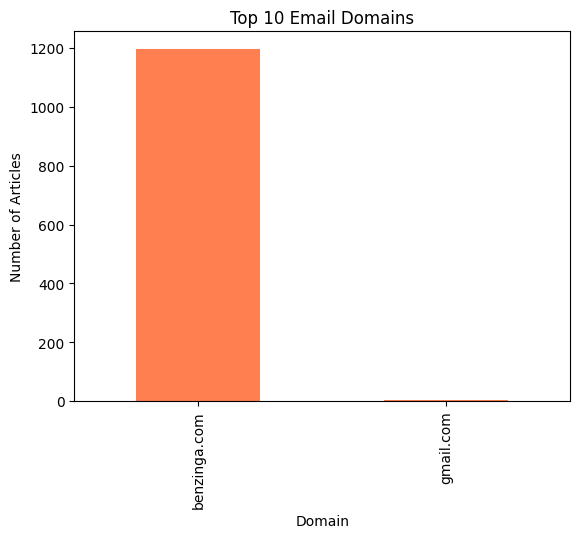

In [33]:
df['email_domain'] = df['publisher'].str.extract(r'@([\w\.-]+)')

domain_counts = df['email_domain'].value_counts().dropna()
print("Top Email Domains:\n", domain_counts.head(10))

# Plot the top 10 domains
domain_counts.head(10).plot(kind='bar', color='coral')
plt.title('Top 10 Email Domains')
plt.xlabel('Domain')
plt.ylabel('Number of Articles')
plt.show()
